# Lantern Scrolling Odds and Expected Return

Goals:
1. Find expected number of items and scrolls required to hit a perfect item given scrolling odds and n slots.
2. Using the expected number of required items and scrolls, find the distribution of items with 0 to n successes.
3. Using the distribution above, repeat steps 1 and 2 with n-1 slots but with scrolls of varying perentages
4. Find expected return given market pricing

In [85]:
import math

slots = 7
scroll_success = 0.7

def items_for_perfect(p_success, max_scrolls):
    return 1/pow(p_success, max_scrolls)

def expected_scrolls_per_item(p_success, max_scrolls):
    p_fail = 1 - p_success
    expected_scrolls = 0

    for scroll in range(1, max_scrolls + 1):
        if scroll < max_scrolls:
            expected_scrolls += scroll * (p_fail * p_success**(scroll-1))
        else:
            expected_scrolls += scroll * p_success**max_scrolls
    
    return expected_scrolls

required_items = int(math.ceil(items_for_perfect(scroll_success, slots)))
required_scrolls = math.ceil(expected_scrolls_per_item(scroll_success, slots) * required_items)

print("For an item with", slots, "slots, you need", required_items, "items and", required_scrolls, "scrolls.")

For an item with 7 slots, you need 13 items and 37 scrolls.


In [86]:
# simulating
import random
import numpy as np

sample_size = 1000

def simulate(p_success, max_scrolls):
  total_scrolls = 0
  total_items = 0
  while True:
    total_items += 1
    for scroll in range(max_scrolls):
      total_scrolls += 1
      if random.uniform(0.0001, 0.9999) > p_success:
        break
      if scroll == max_scrolls - 1:
        return total_items, total_scrolls

def analyze(p_success, max_scrolls, iterations):
  total_items, total_scrolls = [], []
  for _ in range(iterations):
    items_used, scrolls_used = simulate(p_success, max_scrolls)
    total_items.append(items_used)
    total_scrolls.append(scrolls_used)
  return total_items, total_scrolls

item_distribution, scroll_distribution = analyze(scroll_success, slots, sample_size)

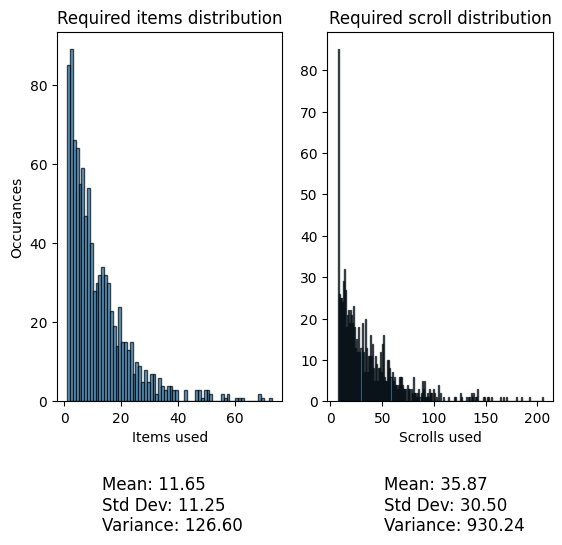

In [96]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)

# Item graph
axs[0].hist(item_distribution, bins=range(min(item_distribution), max(item_distribution) + 2), edgecolor='black', alpha=0.7)

axs[0].set_title('Required items distribution')
axs[0].set_xlabel('Items used')
axs[0].set_ylabel('Occurances')

mean_items = np.mean(item_distribution)
item_var = np.var(item_distribution)
item_std = np.std(item_distribution)

item_data = f'Mean: {mean_items:.2f}\nStd Dev: {item_std:.2f}\nVariance: {item_var:.2f}'
axs[0].text(-1, -0.2, item_data, ha='left', va='top', fontsize=12, transform=plt.gca().transAxes)

# Scroll graph
axs[1].hist(scroll_distribution, bins=range(min(scroll_distribution), max(scroll_distribution) + 2), edgecolor='black', alpha=0.7)

axs[1].set_title('Required scroll distribution')
axs[1].set_xlabel('Scrolls used')

mean_scrolls = np.mean(scroll_distribution)
scroll_var = np.var(scroll_distribution)
scroll_std = np.std(scroll_distribution)

scroll_data = f'Mean: {mean_scrolls:.2f}\nStd Dev: {scroll_std:.2f}\nVariance: {scroll_var:.2f}'
axs[1].text(0.25, -0.2, scroll_data, ha='left', va='top', fontsize=12, transform=plt.gca().transAxes)


# Show the plot
plt.show()